In [1]:
import numpy as np
import pandas as pd
missing_values =["?"]

ff7 =  pd.read_csv('C:\\Users\\adity\\Documents\\visual analytics\\dataset1_dirty.csv', na_values= missing_values)

In [3]:
import fuzzywuzzy
from fuzzywuzzy import process
import nltk

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [5]:
def plot_histogram(x):
    plt.hist(x,color='gray', alpha=0.5)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()
    

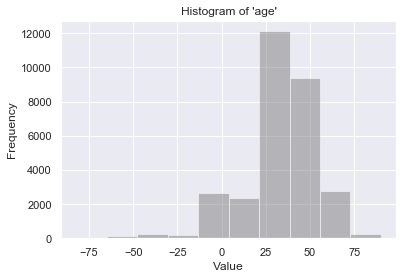

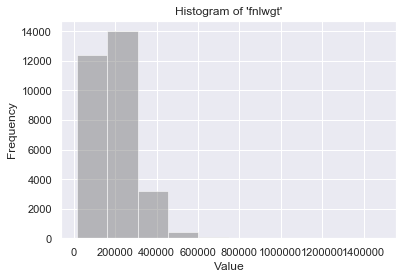

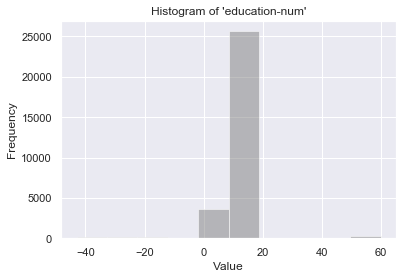

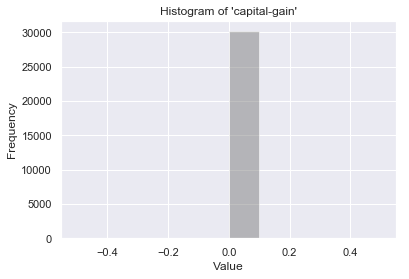

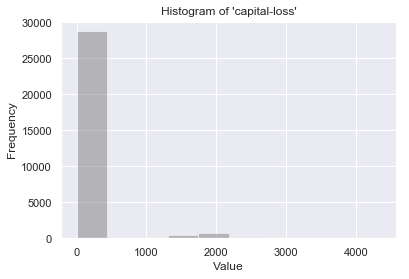

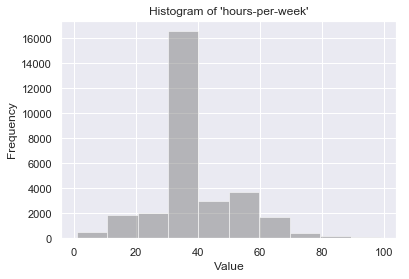

In [6]:
for i  in range(0,len(ff7.columns)):
    histogram=[]
   
    if ff7[ff7.columns[i]].dtypes== np.int64 or ff7[ff7.columns[i]].dtypes== np.int64  :
        
        histogram=plot_histogram(ff7.iloc[:,i])

In [7]:
def plot_bar(x):
    x_count=x.value_counts()
    sns.barplot(x_count.index, x_count.values, alpha=0.9)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

<Figure size 1440x720 with 0 Axes>

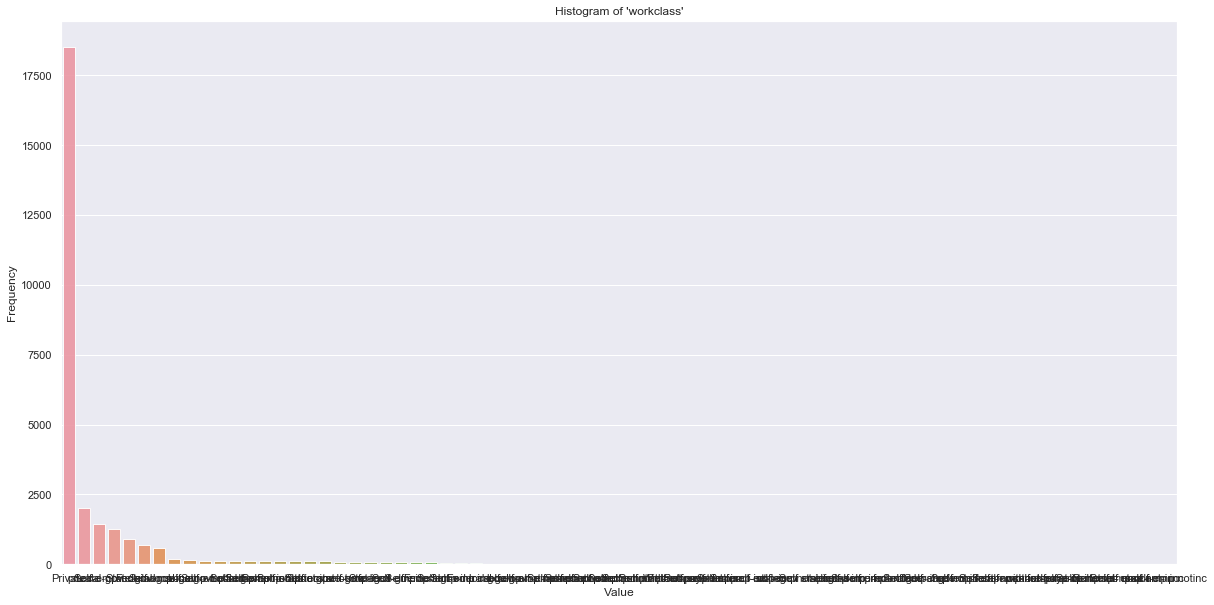

<Figure size 1440x720 with 0 Axes>

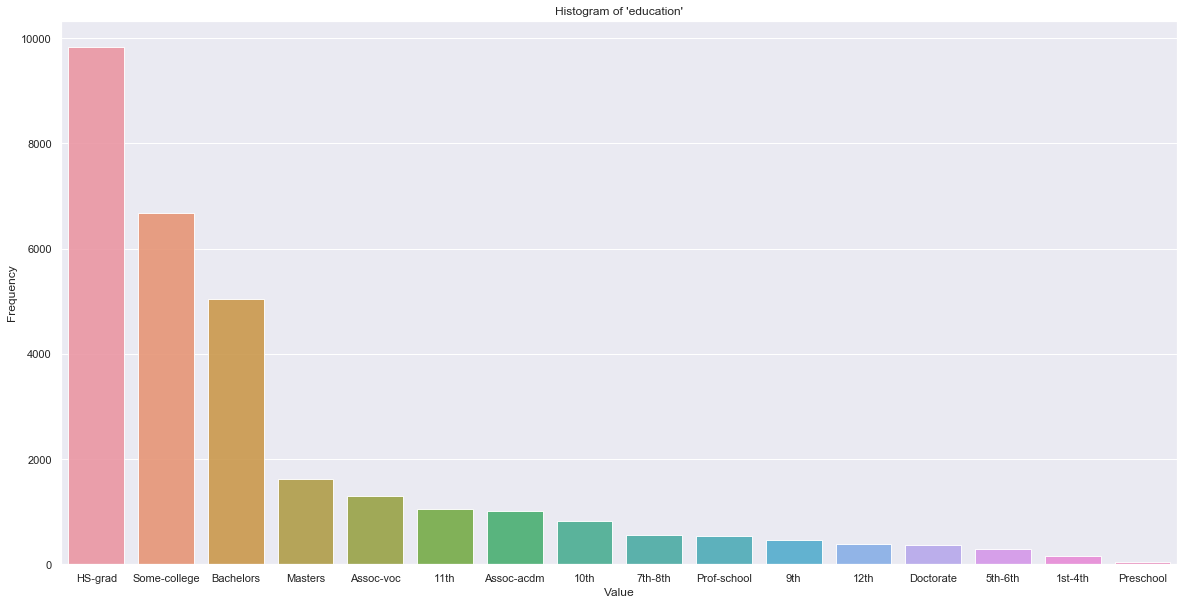

<Figure size 1440x720 with 0 Axes>

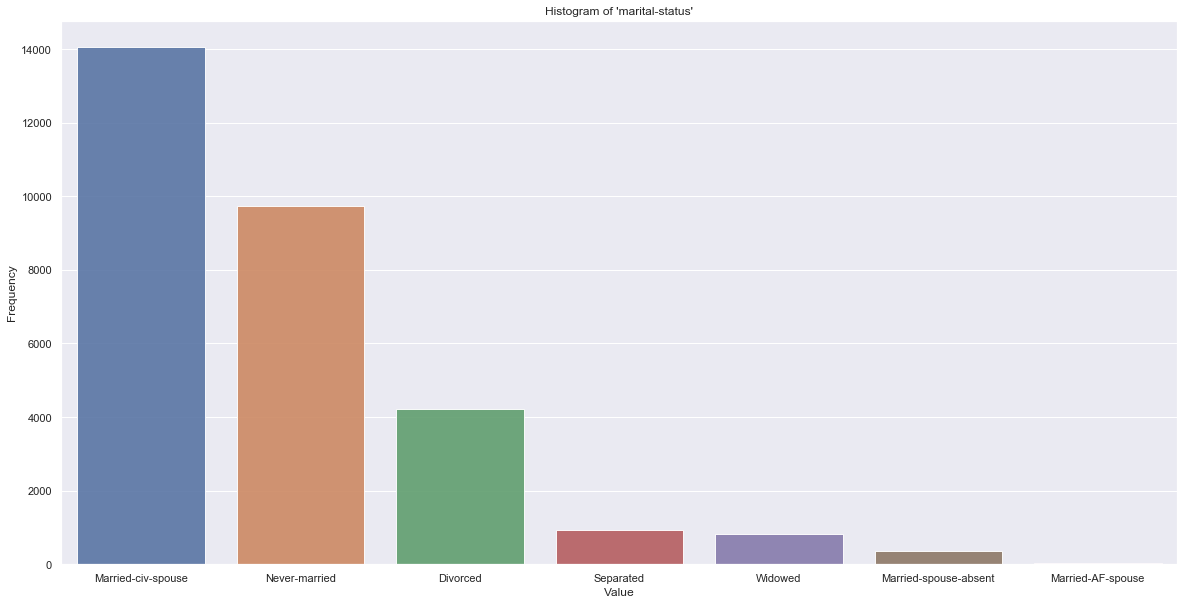

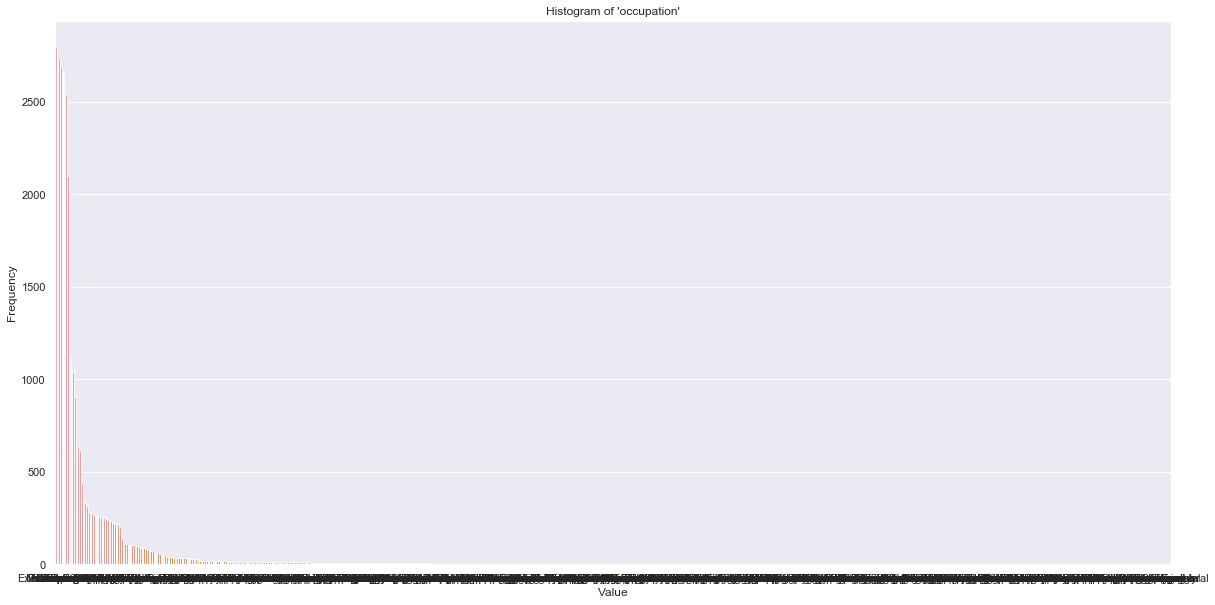

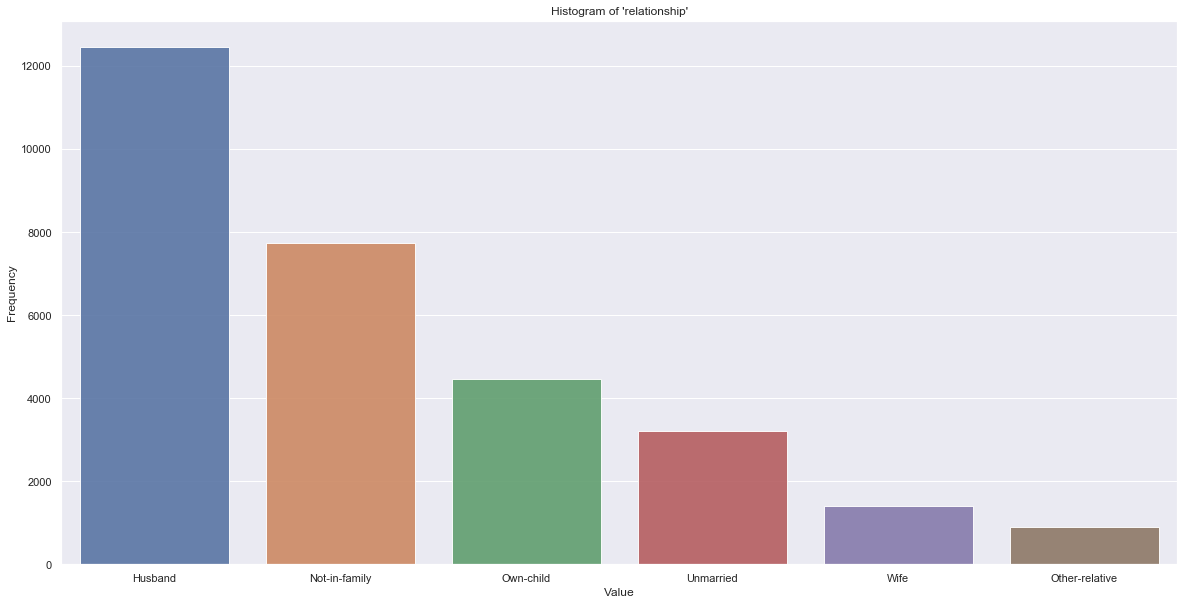

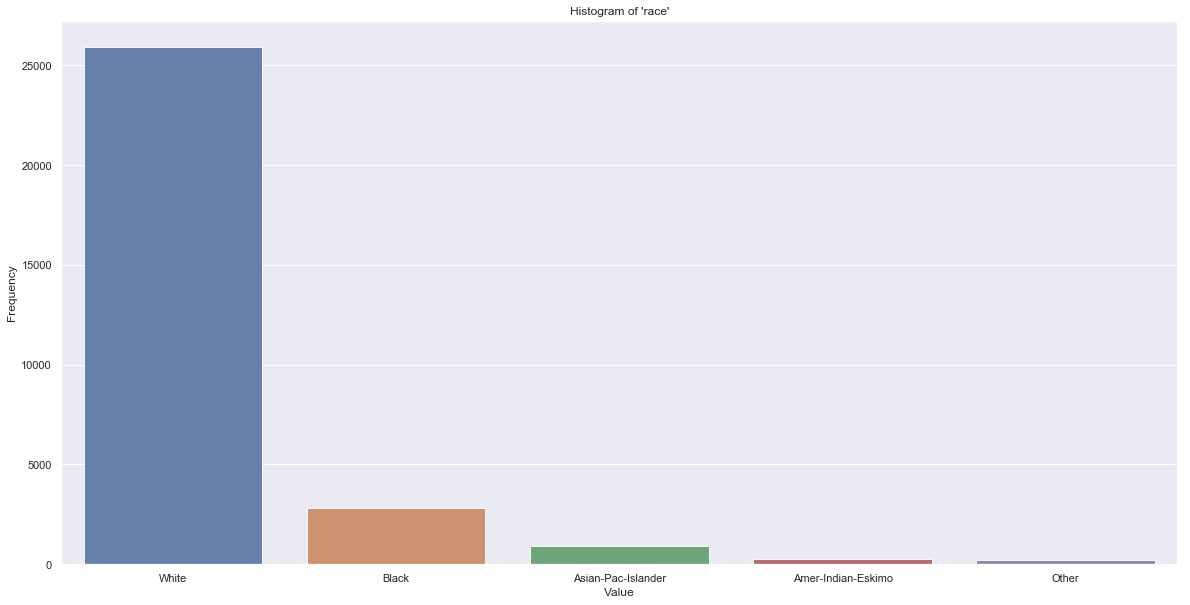

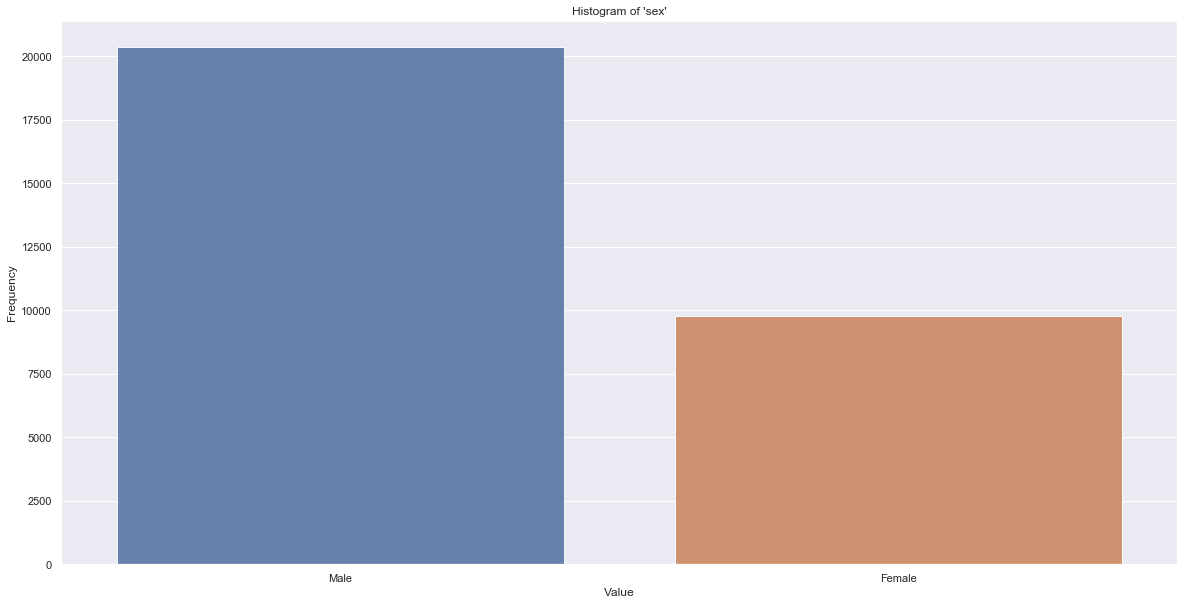

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

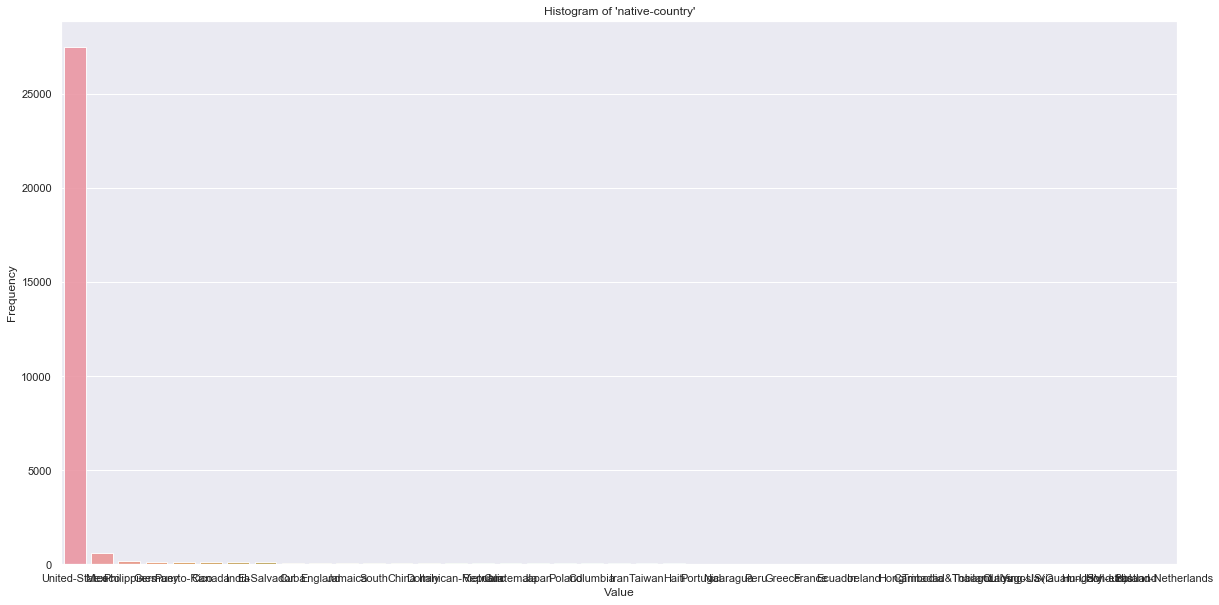

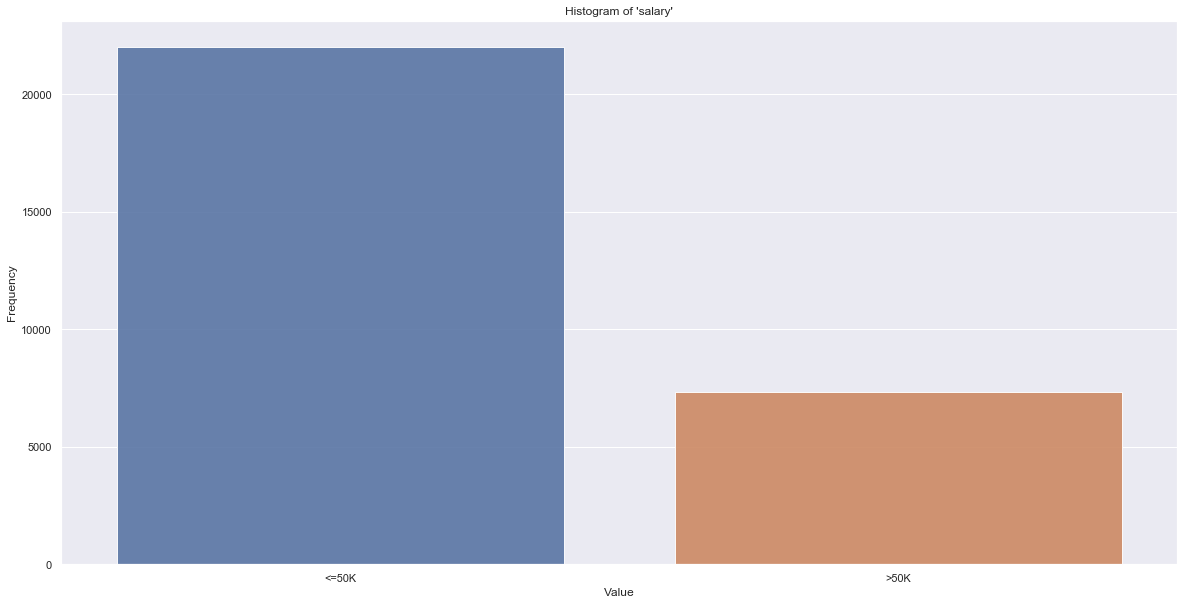

In [11]:
for i  in range(0,len(ff7.columns)):
    histogram=[]
    plt.figure(figsize=(20,10))
    if ff7[ff7.columns[i]].dtypes== np.object or ff7[ff7.columns[i]].dtypes== np.object  :
        
        histogram=plot_bar(ff7.iloc[:,i])
       

In [12]:
def find_outliers_tukey(x):
    q1= np.percentile(x,25)
    q3= np.percentile(x,75)
    iqr=q3-q1
    floor=q1 - 1.5*iqr
    ceiling=q3 + 1.5*iqr
    outlier_indices = list(x.index[(x<floor) | (x>ceiling) ] )
    outlier_values = list(x[outlier_indices])    
    return outlier_indices, outlier_values

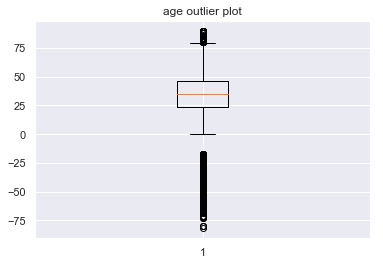

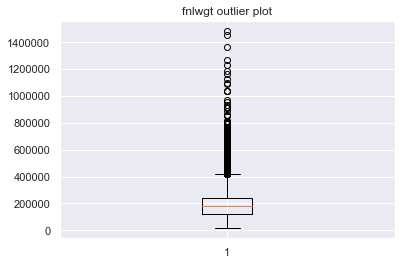

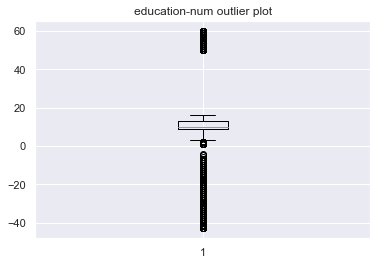

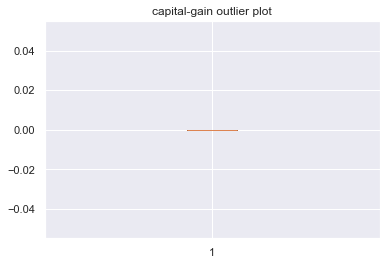

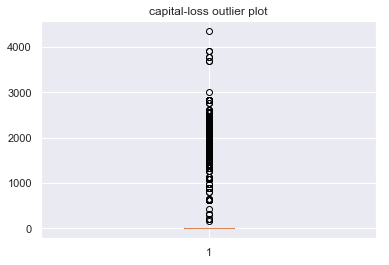

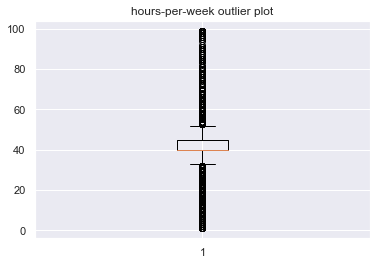

In [14]:
for i  in range(0,len(ff7.columns)):
    outliers=[]
   
    if ff7[ff7.columns[i]].dtypes== np.int64 or ff7[ff7.columns[i]].dtypes== np.int64  :
        
        outliers=find_outliers_tukey(ff7.iloc[:,i])
        if len(outliers)>0:
                   
            ax = plt.subplot(1,1,1)
            
            ax.boxplot(ff7[list(ff7.columns)[i]])
            plt.title(list(ff7.columns)[i] + " outlier plot")
            plt.show()

In [15]:
#After checking the outliers, I realized that Age and Education-Num have negative values. 
#THerefore I am removing negative values of age and Education-Num

ff7 = ff7[(ff7['education-num'] > 0) | (ff7['education-num'].isnull())]
ff7 = ff7[(ff7['age'] > 0) | (ff7['age'].isnull())]

#https://stackoverflow.com/questions/44133219/removing-negative-values-in-pandas-column-keeping-nan?rq=1

In [16]:
#After that I am checking if there are any null values still
ff7.isna().sum()

age                  0
workclass         2057
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1992
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary             733
dtype: int64

In [17]:
#String Duplication: Replacing wrong spelling values based on the values provided in the assignment. I used Levenshtein distance for doing the calculation
#Creating a variable for correct values. The mis-spelling is in Occupation and WorkClass Column
dict1=("Tech-support", "Craft-repair", "Other-service", "Sales", "Exec-managerial", "Prof-specialty", "Handlers-cleaners","Machine-op-inspct", "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv", "Protective-serv","Armed-Forces")
print(dict1)

dict2=("Private","Self-emp-not-inc", "Self-emp-inc", "Federal-gov", "Local-gov", "State-gov", "Without-pay", "Never-worked")
print(dict2)

('Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces')
('Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked')


In [18]:
#Creating a get_ratio function for creating re-useable code
#https://stackoverflow.com/questions/2460177/edit-distance-in-python
def get_ratio(ff7):
    name = ff7['occupation'].unique()
    name= name[~pd.isnull(name)]
    name2 = dict1
    
    #print(name)
    ct=0
    for i in name:
        min1=100
        index=0
        flag=0
        for j in name2:
            if i==j: 
                flag=1
                break
            #print(i,j)
            temp=nltk.edit_distance(j,i)
            #print(temp)
            if temp==0 :
                continue
            if temp<min1 :
                
                min1=temp
#                 print('min'+str(min1))
                index=j
            #print(temp)
        #df.loc[ff4['occupation']==i,'occupation']=j 
            #if temp>=80 :
        if flag==0:
            #print(i,index)    
            ff7=ff7.replace(i,index)
                    
    return ff7
ff7=get_ratio(ff7)
print(ff7['occupation'])

0             Adm-clerical
1          Exec-managerial
2        Handlers-cleaners
3        Handlers-cleaners
4           Prof-specialty
5          Exec-managerial
6            Other-service
7          Exec-managerial
8           Prof-specialty
9          Exec-managerial
10         Exec-managerial
11          Prof-specialty
12            Adm-clerical
13                   Sales
14        Transport-moving
16       Machine-op-inspct
17                   Sales
18         Exec-managerial
19          Prof-specialty
20           Other-service
21         Farming-fishing
22        Transport-moving
24            Tech-support
25                     NaN
26         Exec-managerial
27            Craft-repair
28                     NaN
29                   Sales
30         Exec-managerial
32           Other-service
               ...        
30130     Transport-moving
30131    Machine-op-inspct
30132     Transport-moving
30133         Adm-clerical
30134    Machine-op-inspct
30135                Sales
3

In [19]:
def get_ratio(ff7):
    name = ff7['workclass'].unique()
    name= name[~pd.isnull(name)]
    name2 = dict2
    
    #print(name)
    ct=0
    for i in name:
        min1=100
        index=0
        flag=0
        for j in name2:
            if i==j: 
                flag=1
                break
            #print(i,j)
            temp=nltk.edit_distance(j,i)
            #print(temp)
            if temp==0 :
                continue
            if temp<min1 :
                
                min1=temp
#                 print('min'+str(min1))
                index=j
            #print(temp)
        #df.loc[ff4['occupation']==i,'occupation']=j 
            #if temp>=80 :
        if flag==0:
            #print(i,index)    
            ff7=ff7.replace(i,index)
                    
    return ff7
ff7=get_ratio(ff7)
print(ff7['workclass'])

0               State-gov
1        Self-emp-not-inc
2                 Private
3                 Private
4                 Private
5                 Private
6                     NaN
7        Self-emp-not-inc
8                 Private
9                 Private
10                Private
11              State-gov
12                Private
13                Private
14                Private
16                Private
17                Private
18       Self-emp-not-inc
19                Private
20                Private
21            Federal-gov
22                Private
24              Local-gov
25                    NaN
26                Private
27                Private
28                    NaN
29                Private
30                Private
32              State-gov
               ...       
30130             Private
30131             Private
30132             Private
30133             Private
30134             Private
30135             Private
30136             Private
30137       

In [20]:
#I am checking the most common values after running the string duplication along with replace.
#From the below result it is evident that the data clean was successful
#https://www.w3resource.com/python-exercises/data-structures-and-algorithms/python-data-structure-exercise-5.php
from collections import Counter
word_counts = Counter(ff7['occupation'])
top_four = word_counts.most_common(35)
print(top_four)

[('Prof-specialty', 3243), ('Craft-repair', 3242), ('Exec-managerial', 3238), ('Adm-clerical', 3032), ('Sales', 2854), ('Other-service', 2613), (nan, 1992), ('Machine-op-inspct', 1574), ('Transport-moving', 1268), ('Handlers-cleaners', 1108), ('Farming-fishing', 788), ('Tech-support', 755), ('Protective-serv', 529), ('Priv-house-serv', 105), ('Armed-Forces', 8)]


In [21]:
#I am checking the most common values after running the string duplication along with replace.
#From the below result it is evident that the data clean was successful
#https://www.w3resource.com/python-exercises/data-structures-and-algorithms/python-data-structure-exercise-5.php
from collections import Counter
word_counts = Counter(ff7['workclass'])
top_four = word_counts.most_common(35)
print(top_four)

[('Private', 17987), (nan, 2057), ('Self-emp-not-inc', 1993), ('Local-gov', 1667), ('State-gov', 1030), ('Self-emp-inc', 843), ('Federal-gov', 760), ('Without-pay', 12)]


In [22]:
#After checking the outlier, I realized that captial gain and captial loss are not required columns because there are spread around zero
#For captial gain all values are zero and for captial loss 95% values are zero. 
ff7=ff7.drop(['capital-gain', 'capital-loss'], axis=1)

In [23]:
#I will be replacing the nan values in columns occupation, education and salary under the title of 'Others'. I did not replace
# the values with mode because the distribution was even in occupation and in education it was more towards Private but to confirm 
#this I needed to use a classifier. Thus for future assignment i will classify it further. Similar reason is for salary
#https://stackoverflow.com/questions/13295735/how-can-i-replace-all-the-nan-values-with-zeros-in-a-column-of-a-pandas-datafra

ff7['occupation'] = ff7['occupation'].replace(np.nan, 'Others')
ff7['workclass'] = ff7['workclass'].replace(np.nan, 'Others')
ff7['salary'] = ff7['salary'].replace(np.nan, 'Others')




In [24]:
ff7

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
6,49,Others,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K


In [25]:
#I will only be normalizing fnlwgt,age,education-num and hours-per-week
#https://stackoverflow.com/questions/44639442/pandas-ignore-string-columns-while-doing-normalization
#https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame/48651066

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

ff7_num = ff7.select_dtypes(include=[np.number])
fffd= normalize(ff7_num)
ff7[fffd.columns] = fffd
print(ff7)

            age         workclass    fnlwgt     education  education-num  \
0      0.301370         State-gov  0.042616     Bachelors       0.203390   
1      0.452055  Self-emp-not-inc  0.046559     Bachelors       0.203390   
2      0.287671           Private  0.136593       HS-grad       0.135593   
3      0.493151           Private  0.149571          11th       0.101695   
4      0.150685           Private  0.220115     Bachelors       0.203390   
5      0.273973           Private  0.183494       Masters       0.220339   
6      0.438356            Others  0.098861           9th       0.067797   
7      0.479452  Self-emp-not-inc  0.132508       HS-grad       0.135593   
8      0.191781           Private  0.021025       Masters       0.220339   
9      0.342466           Private  0.098359     Bachelors       0.203390   
10     0.273973           Private  0.180692  Some-college       0.152542   
11     0.178082         State-gov  0.086009     Bachelors       0.203390   
12     0.082

In [26]:
ff7.to_csv('./dataset1_processed.csv',index=False)

<Figure size 1440x720 with 0 Axes>

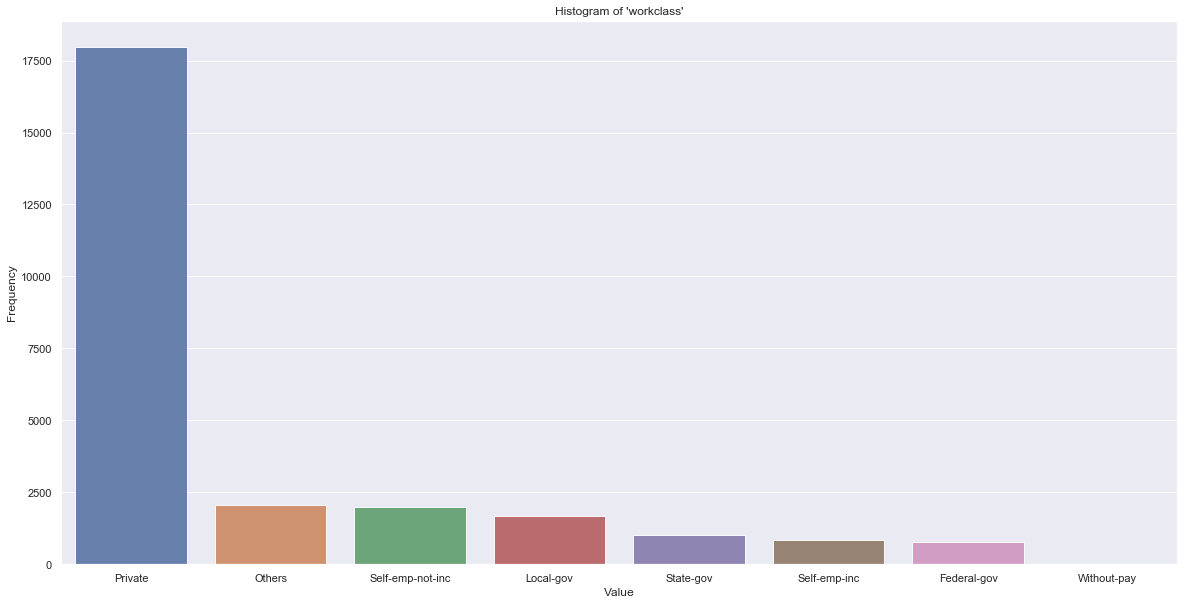

<Figure size 1440x720 with 0 Axes>

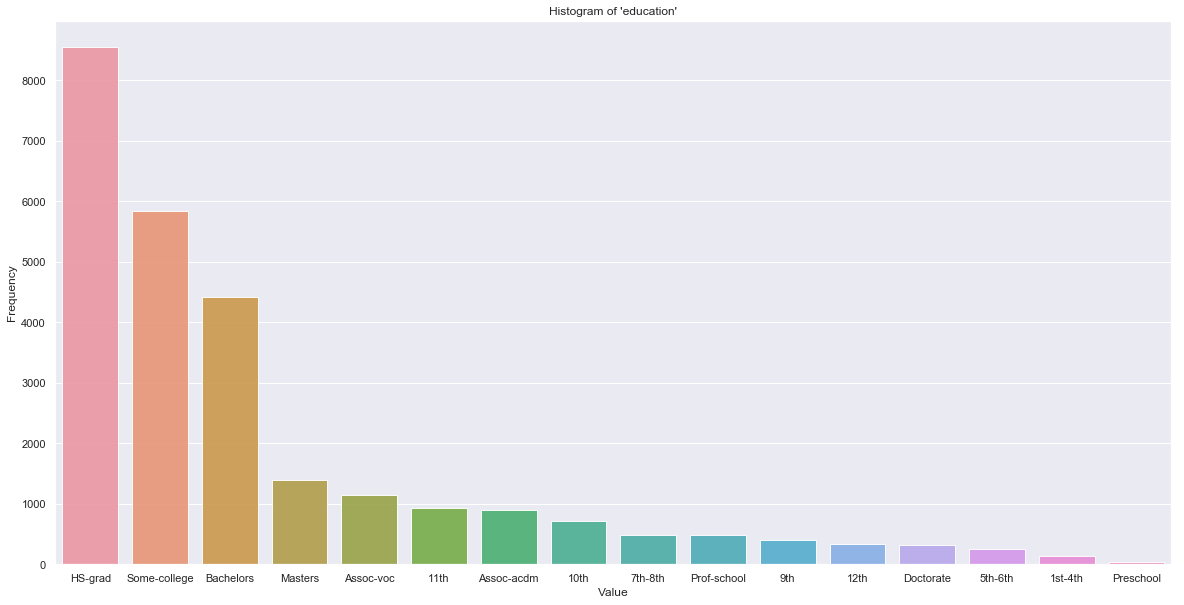

<Figure size 1440x720 with 0 Axes>

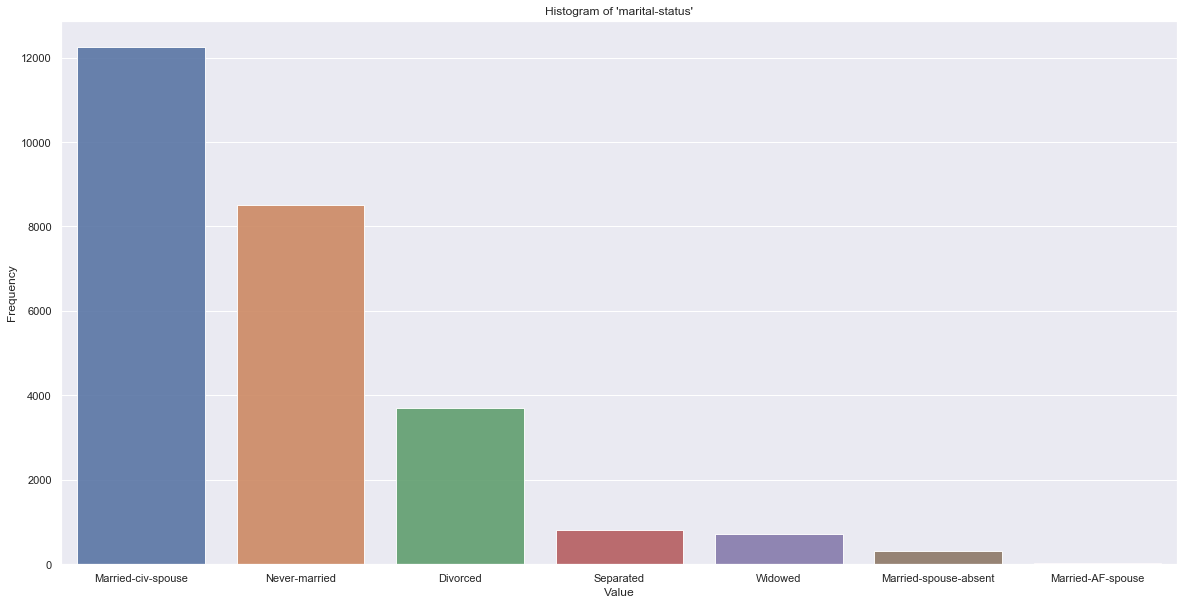

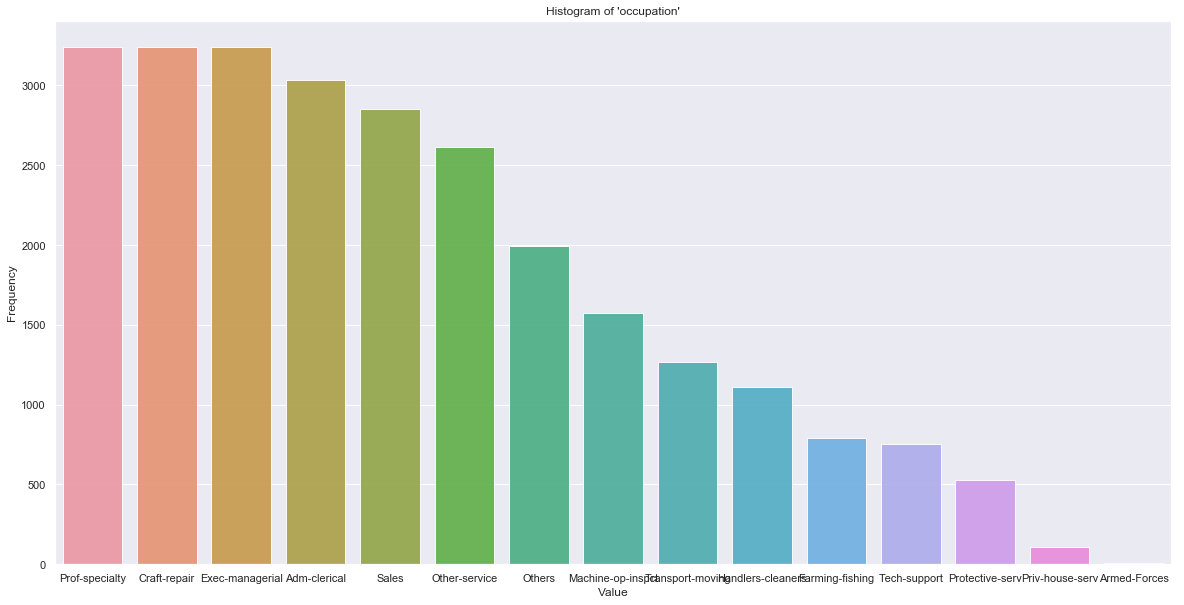

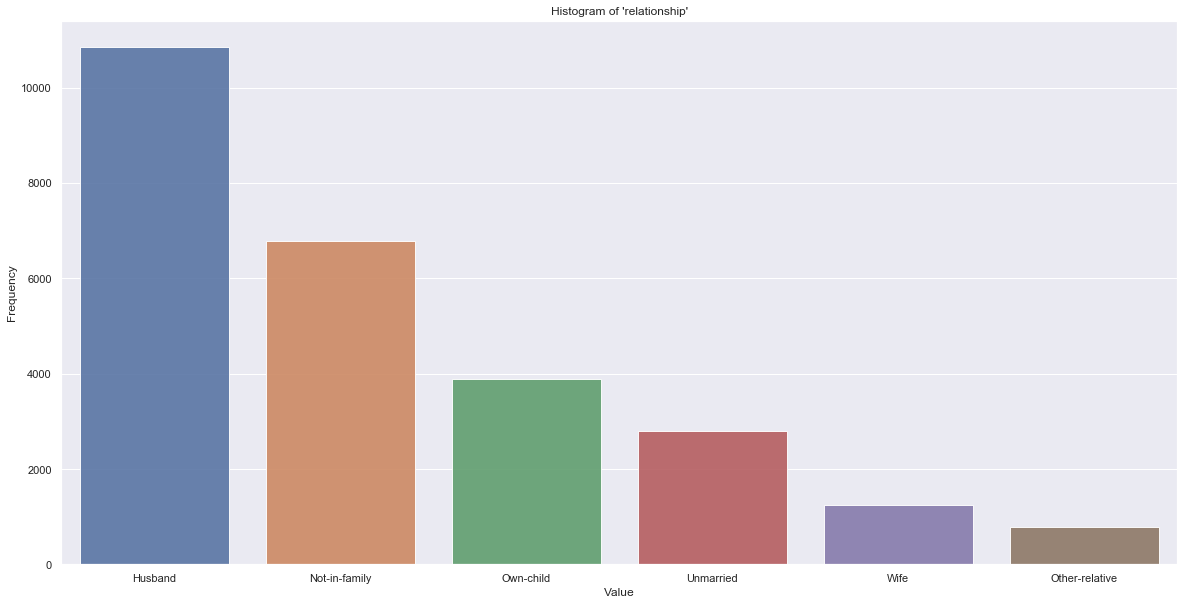

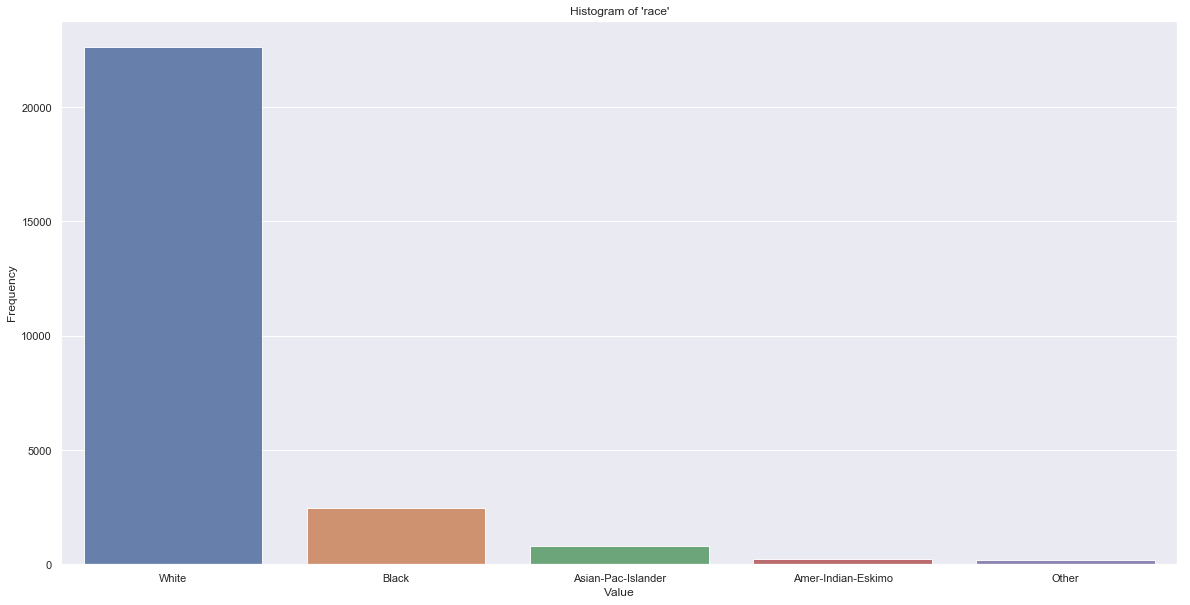

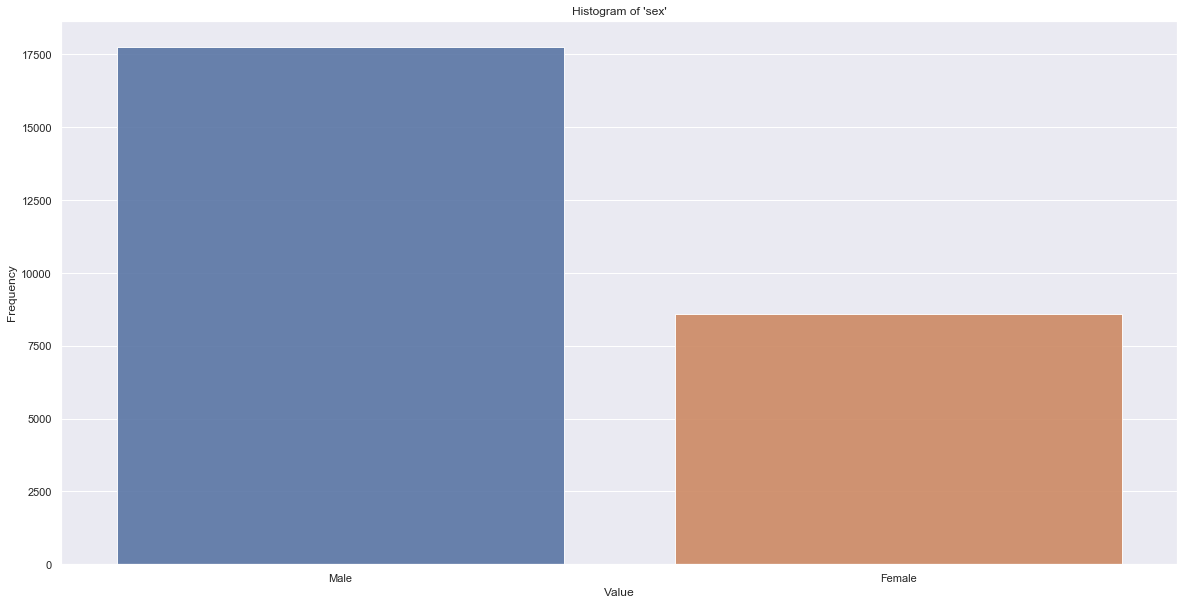

<Figure size 1440x720 with 0 Axes>

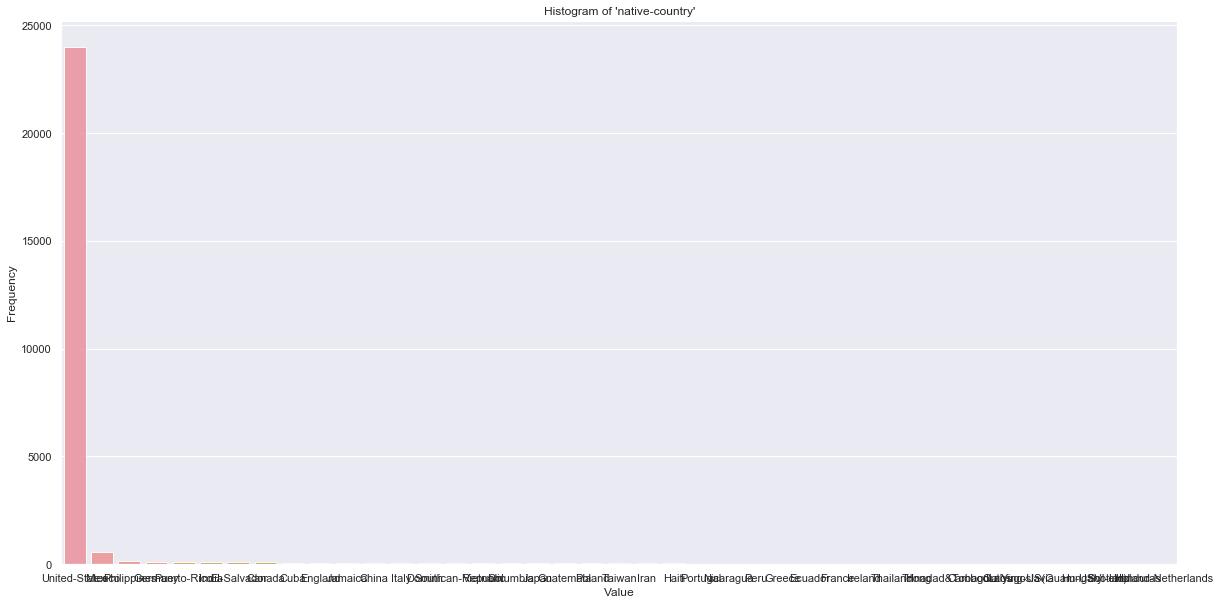

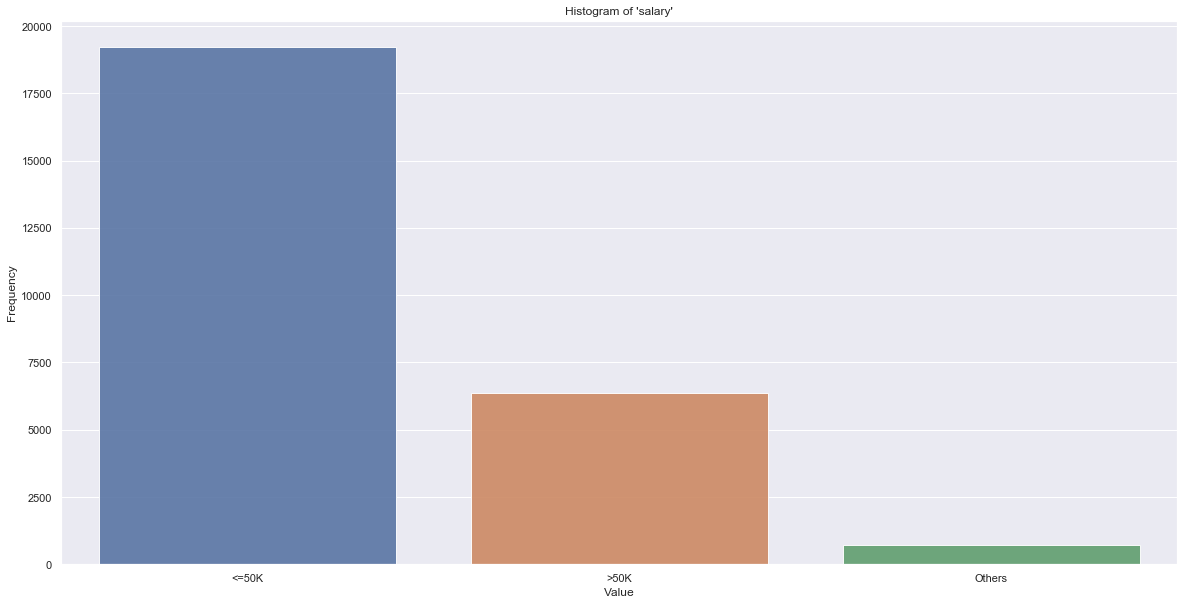

In [27]:
for i  in range(0,len(ff7.columns)):
    histogram=[]
    plt.figure(figsize=(20,10))
    if ff7[ff7.columns[i]].dtypes== np.object or ff7[ff7.columns[i]].dtypes== np.object  :
        
        histogram=plot_bar(ff7.iloc[:,i])

In [31]:
ff7.dtypes

age               float64
workclass          object
fnlwgt            float64
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
hours-per-week    float64
native-country     object
salary             object
dtype: object

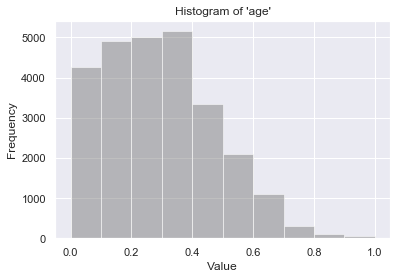

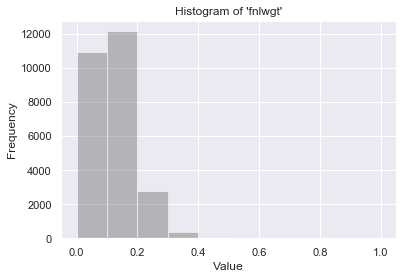

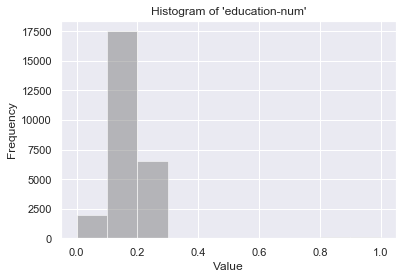

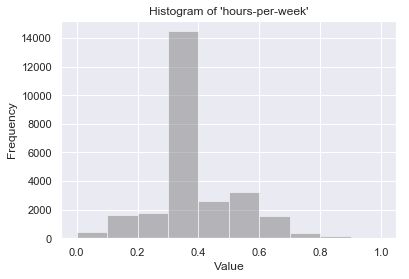

In [32]:
for i  in range(0,len(ff7.columns)):
    histogram=[]
   
    if ff7[ff7.columns[i]].dtypes== np.float64 or ff7[ff7.columns[i]].dtypes== np.float64  :
        
        histogram=plot_histogram(ff7.iloc[:,i])

In [33]:
ff7.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
salary            0
dtype: int64